In [2]:
from hossam import load_data
from scipy.stats import t
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt 


In [4]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [6]:
origin = load_data('height')
origin

[data] https://data.hossam.kr/data/lab10/height.xlsx
[desc] 어느 학교의 학년, 성별, 키에 대한 가상의 조사 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169
5,4,남자,175
6,2,남자,179
7,1,여자,166
8,1,남자,169
9,1,남자,164


In [8]:
clevel = 0.95
data = origin['키']

In [10]:
n = len(data)
n

36

자유도:주어진 제약조건(규칙) 때문에 마음대로 바꿀 수 없는 값을 제외하고, 실제로 ‘자유롭게 움직일 수 있는’
값의 수
예) x + x + x = 30 일 때, x , x 두 개의 값이 결정되면 나머지 하나는 자동으로 결정된다. 그러므로 이
경우 자유롭게 정할 수 있는 값은 2개, 즉 자유도 = 2
통계에서의 자유도는 n − 1

In [12]:
dof = n-1
dof

35

In [14]:
sample_mean = data.mean()
sample_mean

np.float64(167.83333333333334)

In [16]:
sample_std = data.std()
sample_std

np.float64(7.315345905306578)

In [18]:
#sample_std_error = sample_std /n**0.5

sample_std_error = sample_std / sqrt(n)
sample_std_error

np.float64(1.2192243175510964)

In [19]:
cmin , cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin, cmax

(np.float64(165.35817637995726), np.float64(170.30849028670943))

C:\Users\itwill\AppData\Local\Temp\ipykernel_2972\1048791716.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette="pastel")


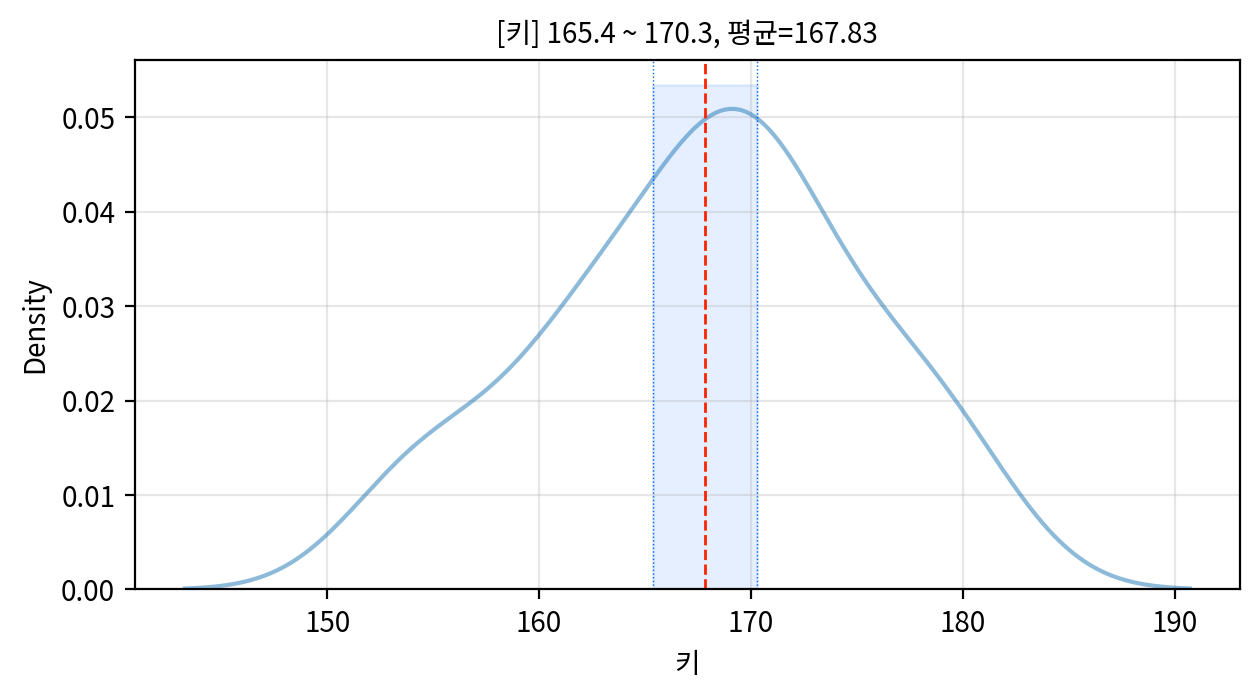

In [21]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.kdeplot(data=data, fill=False, alpha=0.5, palette="pastel")

ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

ax.axvline(sample_mean, linestyle='--', linewidth=1, color='#ff2200')

ax.grid(True, alpha=0.3)
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sample_mean:0.2f}", fontsize=10)


plt.tight_layout()
plt.show()
plt.close()